# PreFRBLE + Magnetizer

## Prepares galaxy stellar mass function and cumulative GSMF


### Basic imports and setup

In [1]:
%matplotlib inline
import sys, os, os.path
import numpy as np
sys.path.append('/home/lrodrigues/Magnetizer/python/')
import matplotlib.pyplot as plt
import seaborn as sns
import magnetizer.prepare_pandas
import astropy.units as u
import astropy.constants as c
import magnetizer
import magnetizer.visualization as visu

In [46]:
import matplotlib as mpl
mnras_column_size = 3.32153
mnras_text_size = 6.97522
mpl.rcParams['figure.figsize'] = [mnras_text_size, mnras_text_size/2.]
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['text.usetex'] = False
# mpl.rcParams['text.latex.preamble']=[r'\usepackage{amsmath,newtxmath}']

In [ ]:
nvols = 100

input_files_a = ['/home/lrodrigues/storage/magnetizer_inputs/Lacey14_{}_corr.hdf5'.format(i) 
               for i in range(1,nvols+1) if i not in [0]] #ivol=3 file got currupted and will be ignored
output_files_a = ['/scratch/lrodrigues/mag_outputs/Lacey14_{}_corr.hdf5'.format(i) 
                for i in range(1,nvols+1) if i not in [0]]

input_files = []; output_files = []
for i, o in zip(input_files_a, output_files_a):
    
    try:
        r = magnetizer.MagnetizerRun(output_path=o, input_path=i, verbose=False)    
#         print('a')
        r.get('LoS_theta',0)
        input_files.append(i); output_files.append(o)
    except:
        print('Skipping', o)

run = magnetizer.MagnetizerRun(output_path=output_files, 
                               input_path=input_files, verbose=True)

In [10]:
nvols = np.unique(run.ivol).size

print('Number of subvolumes:', nvols)
print('Number of galaxies:', run.ngals)

Number of subvolumes: 41
Number of galaxies: 1303667


In [11]:
print('\n')
z_target = sorted(list(np.arange(0,6,0.1)))
zs = run.redshifts[np.unique(visu.closest_indices(run.redshifts, z_target))][::-1]
print('redshifts:','  '.join([ '{0:.2f}'.format(abs(z)) for z in zs]), '  N =',len(zs))
print('\n')



redshifts: 0.00  0.09  0.21  0.32  0.41  0.51  0.62  0.69  0.83  0.91  0.99  1.08  1.17  1.28  1.39  1.50  1.63  1.77  1.91  2.07  2.24  2.42  2.62  2.83  3.06  3.31  3.58  3.87  4.18  4.52  4.89  5.29  5.72   N = 33




## Caching

In [6]:
for z in zs:
    run.get('Mstars_disk',z)
    run.get('Mstars_bulge',z)

Loading Mstars_disk at z=-5.960464477539063e-08
Loading Mstars_bulge at z=-5.960464477539063e-08
Loading Mstars_disk at z=0.08928775787353516
Loading Mstars_bulge at z=0.08928775787353516
Loading Mstars_disk at z=0.20754897594451904
Loading Mstars_bulge at z=0.20754897594451904
Loading Mstars_disk at z=0.3197028636932373
Loading Mstars_bulge at z=0.3197028636932373
Loading Mstars_disk at z=0.40789902210235596
Loading Mstars_bulge at z=0.40789902210235596
Loading Mstars_disk at z=0.5085909366607666
Loading Mstars_bulge at z=0.5085909366607666
Loading Mstars_disk at z=0.6235902309417725
Loading Mstars_bulge at z=0.6235902309417725
Loading Mstars_disk at z=0.6871089935302734
Loading Mstars_bulge at z=0.6871089935302734
Loading Mstars_disk at z=0.827698826789856
Loading Mstars_bulge at z=0.827698826789856
Loading Mstars_disk at z=0.9054621458053589
Loading Mstars_bulge at z=0.9054621458053589
Loading Mstars_disk at z=0.9887079000473022
Loading Mstars_bulge at z=0.9887079000473022
Loading M

In [59]:
import h5py

def open_create(name, h5file, description=None, units=None):
    if name not in h5file:
        group = h5file.create_group(name)
        if description is not None:
            group.attrs['Description'] = description
        if units is not None:
            group.attrs['Unit'] = units
    else:
        group = h5file[name]
    return group

def add_data(group,name,data):
    if name in group:
        group[name][:] = data
    else:
        group[name] = data
        
        
def add_to_file(b, h, z, name, description, units):
    with h5py.File('../data/galaxy_data.hdf5','a') as h5file:
        z_str = '{0:.2f}'.format(abs(z))
        
        # Creates or opens the relevant groups
        z_group = open_create(z_str, h5file, 'Redshift')
        group = open_create(name, z_group, description, units)

        # Saves the data
        add_data(group,'bins', b)
        add_data(group,'data', h)


## Computation

Prepares the GSMF and its cummulative counterpart

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in log10
  

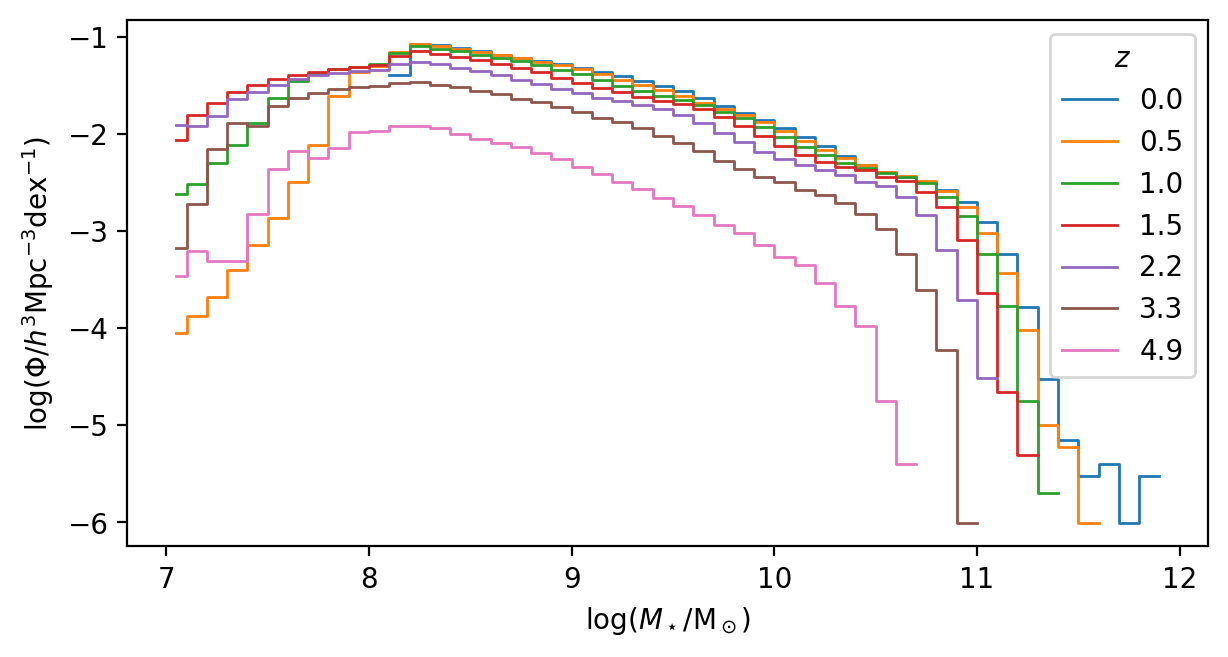

In [60]:
reslim = 7.      # Resolution limit for plot
bin_width = 0.1   # Width of bin
sub_volume = 244140.62
volume = nvols*sub_volume


description = 'Galaxy stellar mass function'
name = 'GSMF'
units = 'h^3 {\rm Mpc}^{-3} {\rm dex}^{-1}'

valid = lambda x : x[np.isfinite(x)]

for i, z in enumerate(zs):
    mstars = valid(run.get('Mstars_disk',z) + run.get('Mstars_bulge',z))
    weight = np.ones_like(mstars.value)/volume

    lgm = np.log10(mstars/u.Msun)

    bin_edges = np.arange( reslim, 12.5, bin_width )                 #these are bin edges, not bin centers

    h, b = np.histogram( lgm, bins=bin_edges, weights=weight/bin_width )    # weight = number per h^-3 Mpc^3 but we want number per dex

    bin_cen = bin_edges[:-1] + 0.5*bin_width

    h = np.log10(h)
    
    add_to_file(bin_cen, h, z, name, description, units)
    
    if i%5==0:
        plt.plot( bin_cen, h, drawstyle="steps-mid",linewidth=1,label='{0:.1f}'.format(abs(z)))
    
        plt.legend(title='$z$')
        
plt.xlabel(r'$\log( M_\star / \rm M_\odot)$')
plt.ylabel( r"$\log ( \Phi / h^3 {\rm Mpc}^{-3} {\rm dex}^{-1})$");       

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/astropy/units/quantity.

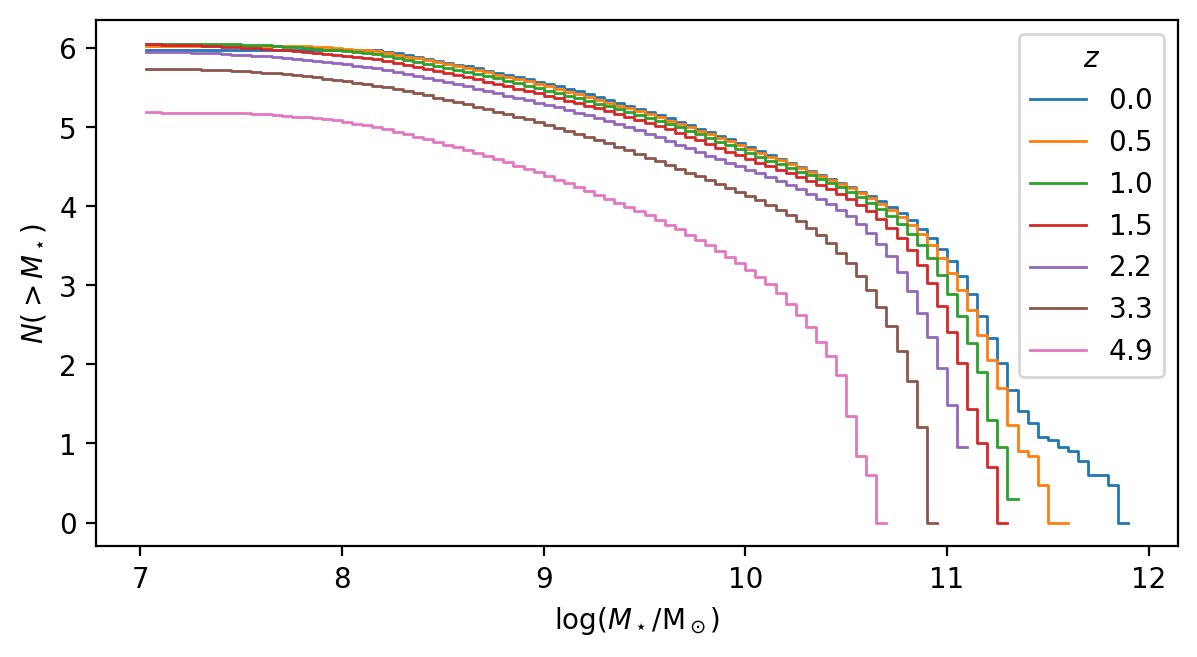

In [61]:
reslim = 7.      # Resolution limit for plot
bin_width = 0.05   # Width of bin
sub_volume = 244140.62

description = 'Cumulative Galaxy stellar mass function'
name = 'cumGSMF'
units = 'h^3 {\rm Mpc}^{-3}'

for i, z in enumerate(zs):
    mstars = run.get('Mstars_disk',z) + run.get('Mstars_bulge',z)

    lgm = np.log10(mstars/u.Msun)

    bin_edges = np.arange( reslim, 12.5, bin_width )

    bin_cen = bin_edges[:-1] + 0.5*bin_width
    
    h = np.zeros_like(bin_cen)
        
    for j, b in enumerate(bin_edges[:-1]):
        h[j] = (lgm > b).sum() # True behaves as 1
        
    add_to_file(bin_cen, h, z, name, description, units)

    if i%5==0:
        plt.plot(bin_cen, np.log10(h), drawstyle="steps-mid",
                 linewidth=1,label='${0:.1f}$'.format(abs(z)))
    
        plt.legend(title='$z$')
#         plt.figure()

plt.xlabel(r'$\log( M_\star / \rm M_\odot)$')

plt.ylabel(r'$N( > M_\star )$');